In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
sns.set_theme(color_codes=True)

In [2]:
df = pd.read_csv("E Commerce Dataset.csv")
df.head()

,Unnamed: 0,CustomerID,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,...,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,50001,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,...,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,50002,1,NaN,Phone,1,8.0,UPI,Male,3.0,...,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,50003,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,...,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,50004,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,...,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,50005,1,0.0,Phone,1,12.0,CC,Male,NaN,...,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


**Data Preprocessing**

In [3]:
df.dtypes

Unnamed: 0                       int64
CustomerID                       int64
Churn                            int64
Tenure                         float64
PreferredLoginDevice            object
CityTier                         int64
WarehouseToHome                float64
PreferredPaymentMode            object
Gender                          object
HourSpendOnApp                 float64
NumberOfDeviceRegistered       float64
PreferedOrderCat                object
SatisfactionScore                int64
MaritalStatus                   object
NumberOfAddress                  int64
Complain                         int64
OrderAmountHikeFromlastYear    float64
CouponUsed                     float64
OrderCount                     float64
DaySinceLastOrder              float64
CashbackAmount                 float64
dtype: object

In [4]:
# Check the number of unique value from all of the object datatype
df.select_dtypes(include='object').nunique()

PreferredLoginDevice    4
PreferredPaymentMode    7
Gender                  4
PreferedOrderCat        6
MaritalStatus           3
dtype: int64

In [5]:
# Remove CustomerID column
df.drop(columns='CustomerID',inplace=True)
df.head()

,Unnamed: 0,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,1,4.0,Mobile Phone,3,6.0,Debit Card,Female,3.0,3.0,Laptop & Accessory,2,Single,9,1,11.0,1.0,1.0,5.0,159.93
1,1,1,NaN,Phone,1,8.0,UPI,Male,3.0,4.0,Mobile,3,Single,7,1,15.0,0.0,1.0,0.0,120.90
2,2,1,NaN,Phone,1,30.0,Debit Card,Male,2.0,4.0,Mobile,3,Single,6,1,14.0,0.0,1.0,3.0,120.28
3,3,1,0.0,Phone,3,15.0,Debit Card,Male,2.0,4.0,Laptop & Accessory,589314,Single,8,0,23.0,0.0,1.0,3.0,134.07
4,4,1,0.0,Phone,1,12.0,CC,Male,NaN,3.0,Mobile,5,Single,3,0,11.0,1.0,1.0,3.0,129.60


**Exporatory Data Analysis**

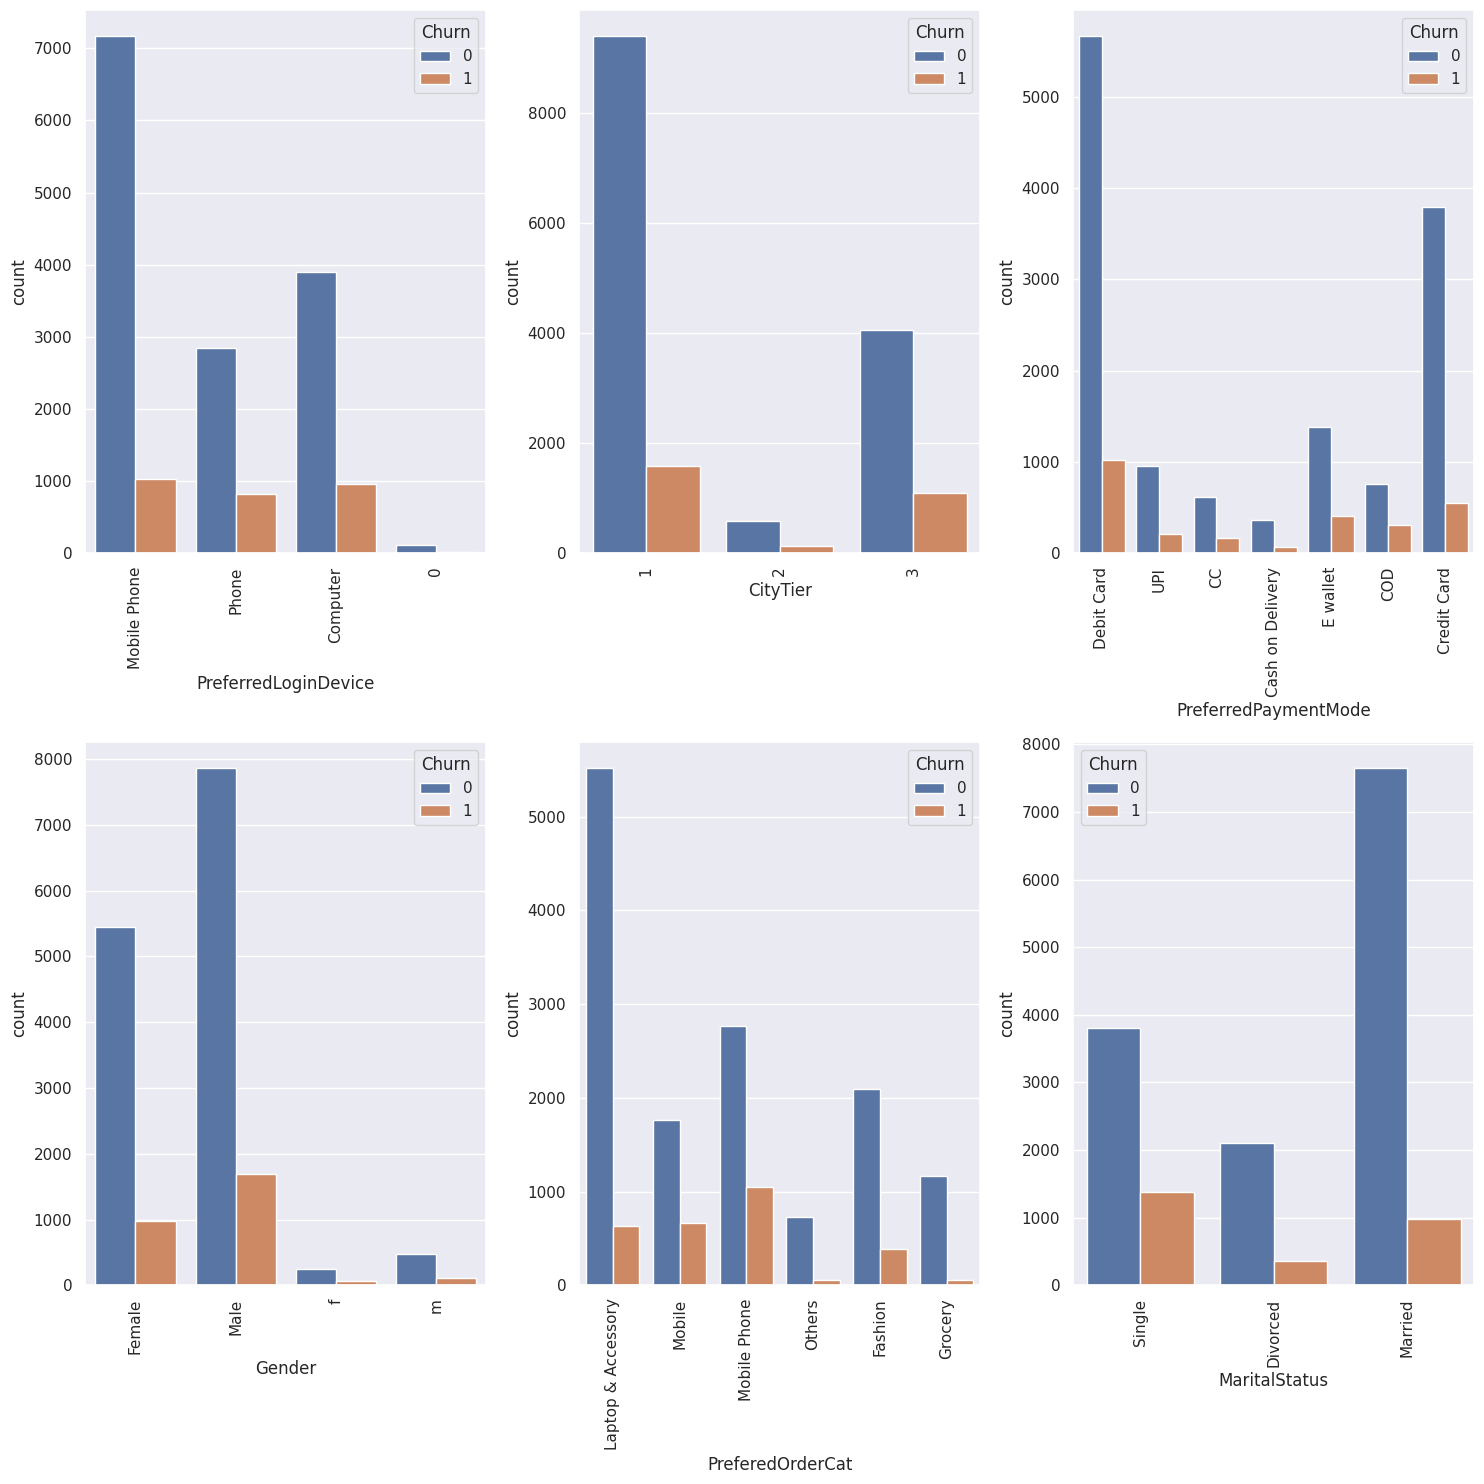

In [6]:
# List of categorical variables to plot
cat_vars = ['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender',
            'PreferedOrderCat','MaritalStatus']

#create figure with subplots
fig , axs = plt.subplots(nrows=2,ncols=3,figsize=(15,15))
axs = axs.flatten()


# create barplot for each categorical variable
for i,var in enumerate(cat_vars):
  sns.countplot(x=var,hue='Churn',data=df,ax=axs[i])
  axs[i].set_xticklabels(axs[i].get_xticklabels(),rotation=90)

# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

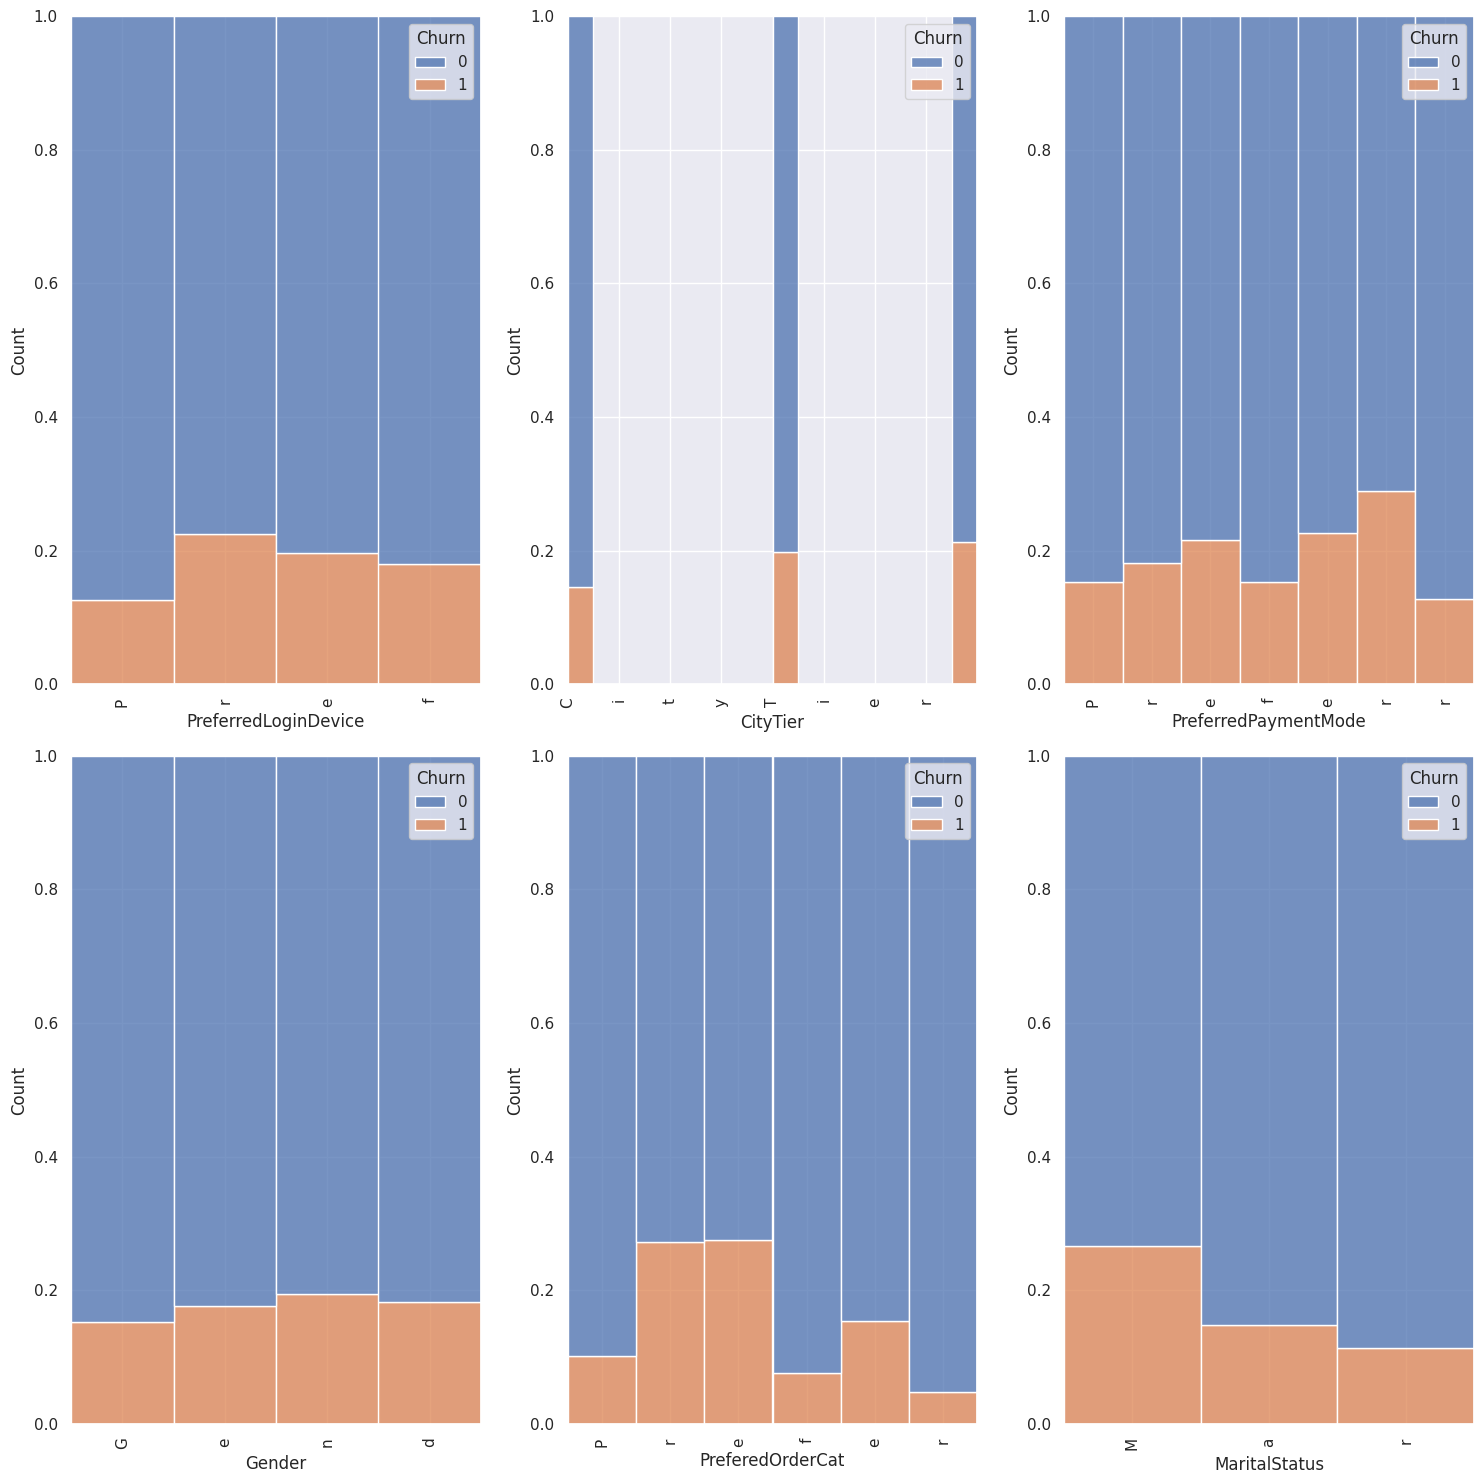

In [7]:
import warnings
warnings.filterwarnings("ignore")
# get list of categorical variables
cat_vars = ['PreferredLoginDevice','CityTier','PreferredPaymentMode','Gender',
            'PreferedOrderCat','MaritalStatus']

#create figure with subplots
fig , axs = plt.subplots(nrows=2,ncols=3,figsize=(15,15))
axs = axs.flatten()


# create barplot for each categorical variable
for i,var in enumerate(cat_vars):
  sns.histplot(x=var,hue='Churn',data=df,ax=axs[i],multiple="fill",kde=False,element="bars")
  axs[i].set_xticklabels(df[var].unique(),rotation=90)
  axs[i].set_xticklabels(var)


# adjust spacing between subplots
fig.tight_layout()

# show plot
plt.show()

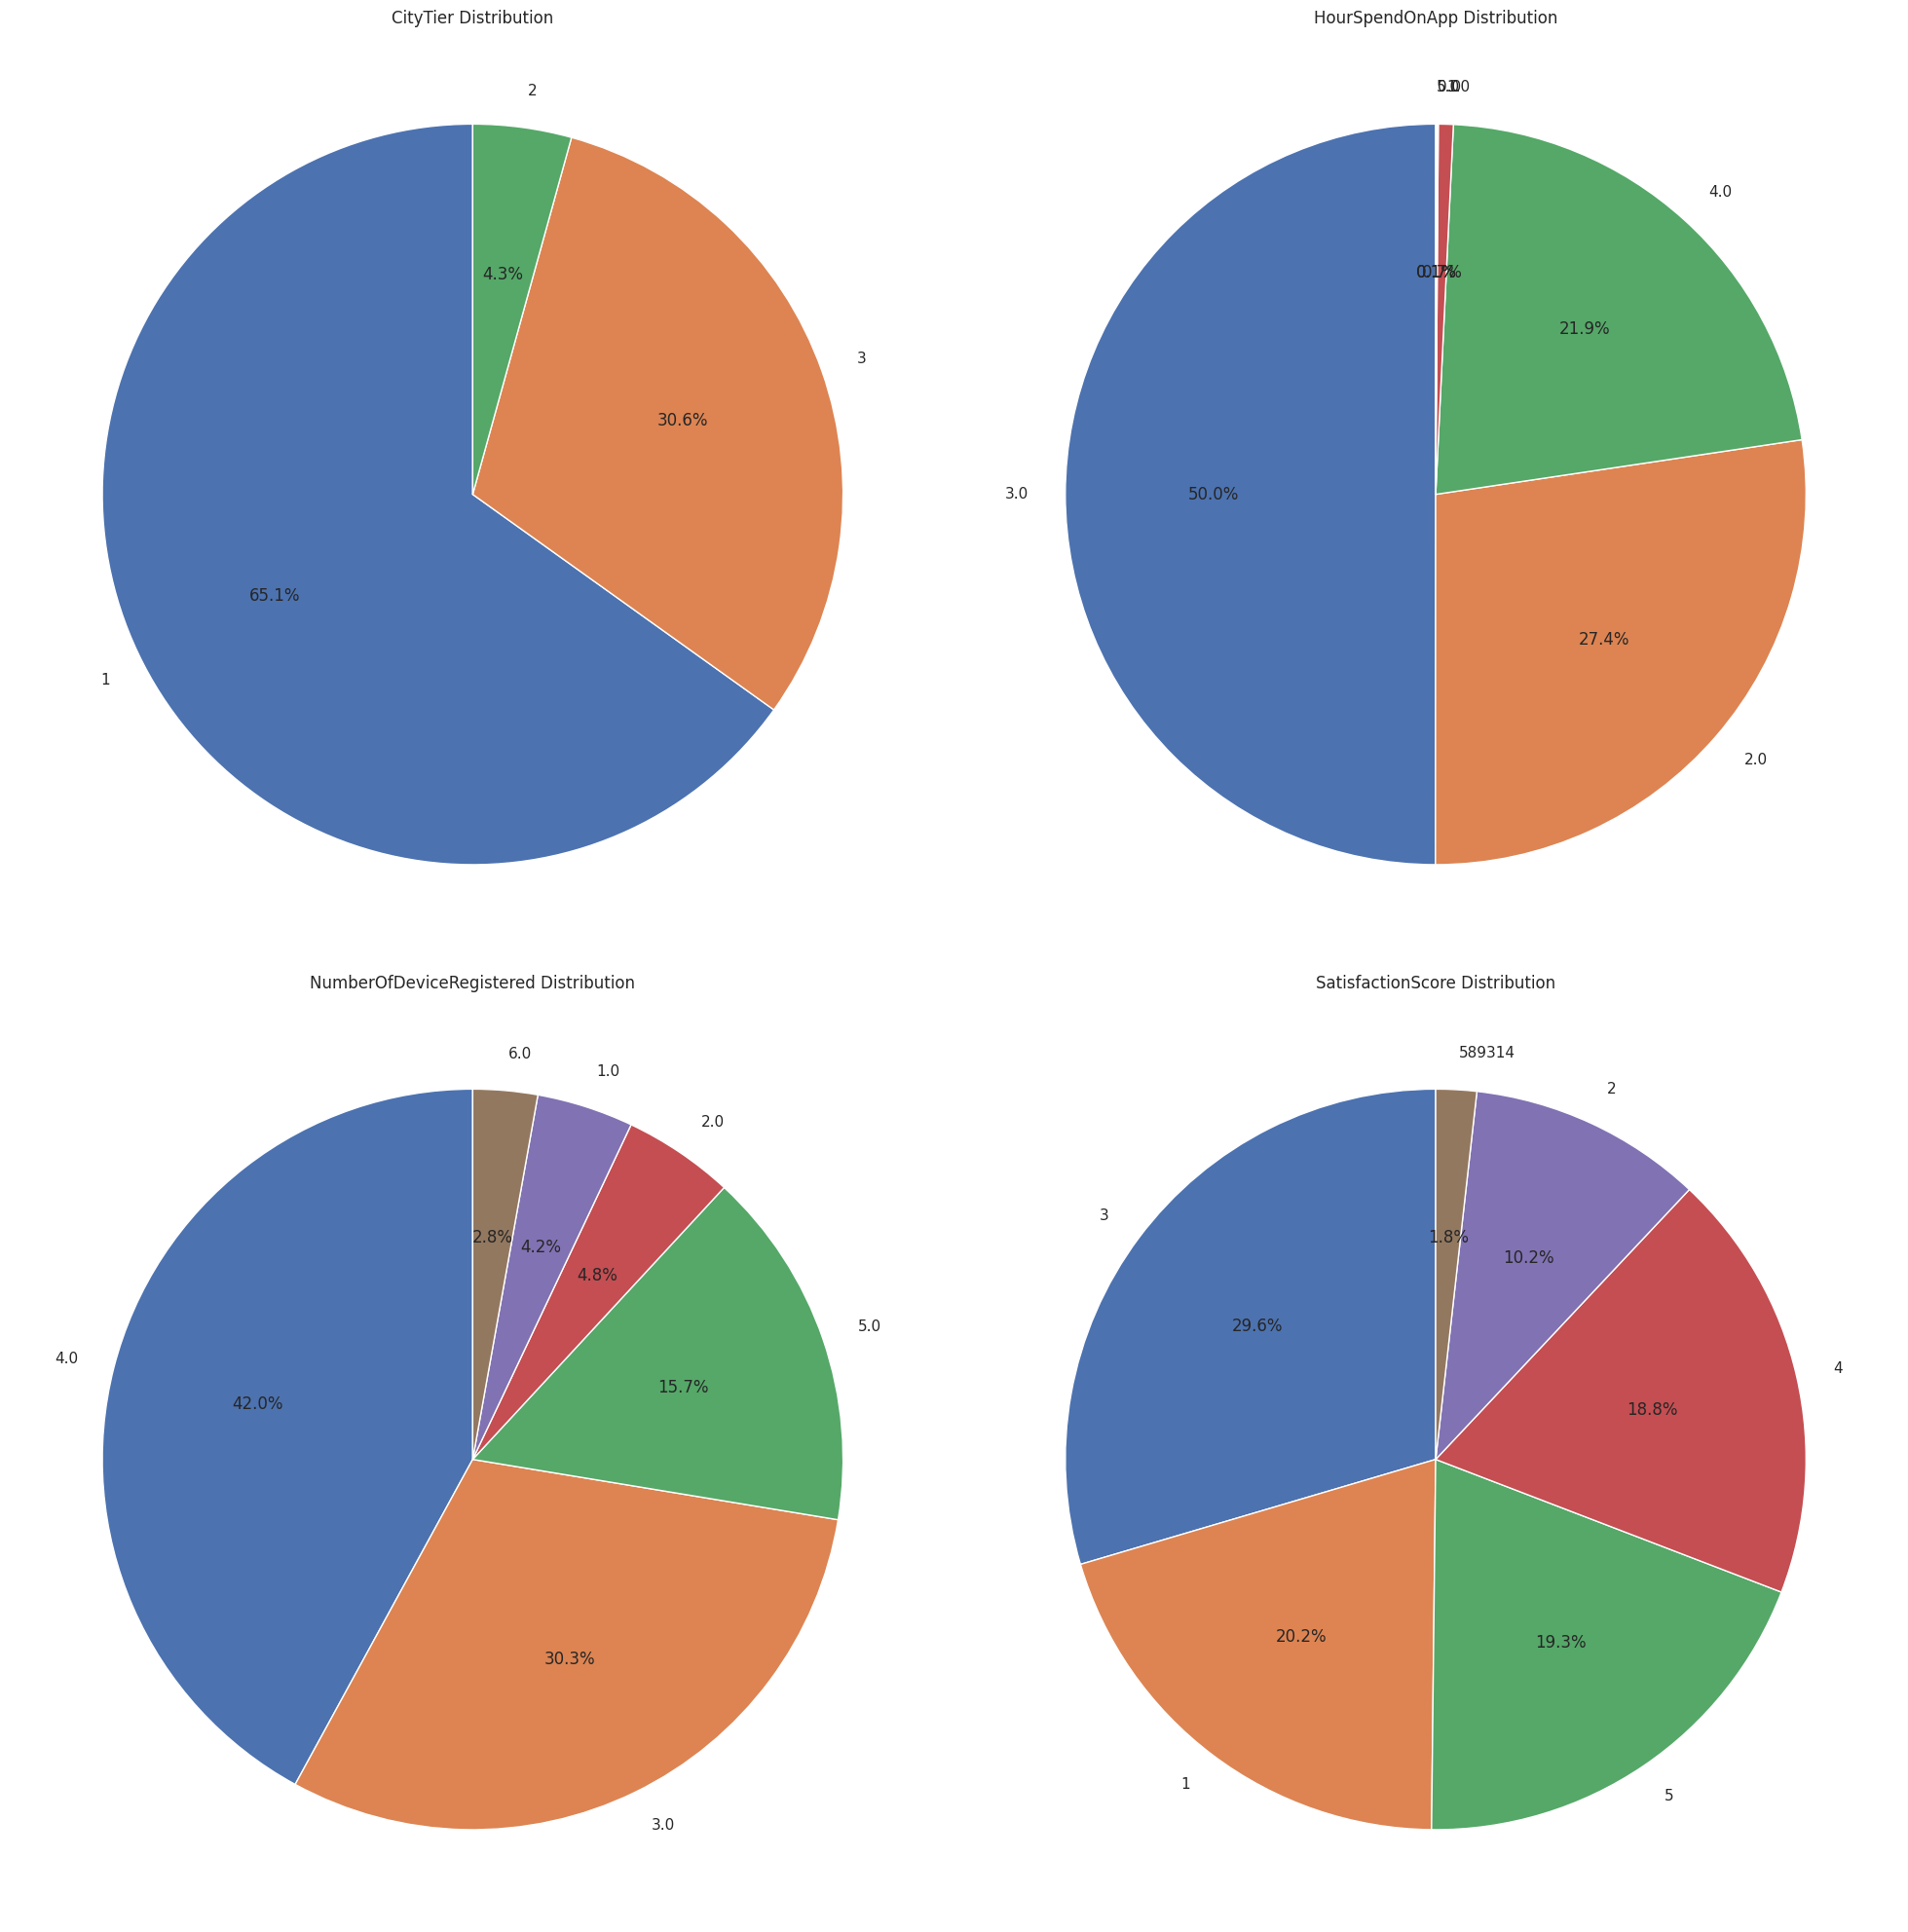

In [8]:
cat_vars = ['CityTier','HourSpendOnApp','NumberOfDeviceRegistered','SatisfactionScore']

# create a figure and axes
fig,axs = plt.subplots(nrows=2,ncols=2,figsize=(20,20))

# create a pie chart for each categorical variable
for i , var in enumerate(cat_vars):
  if i < len(axs.flat):
    # count the number of occurrences for each category
    cat_counts = df[var].value_counts()

    # create a pie chart
    axs.flat[i].pie(cat_counts,labels=cat_counts.index,autopct='%1.1f%%',startangle=90)

    # set a title for each subplot
    axs.flat[i].set_title(f'{var} Distribution')

# adjust spacing between subplots
fig.tight_layout()

# show the plot
plt.show()

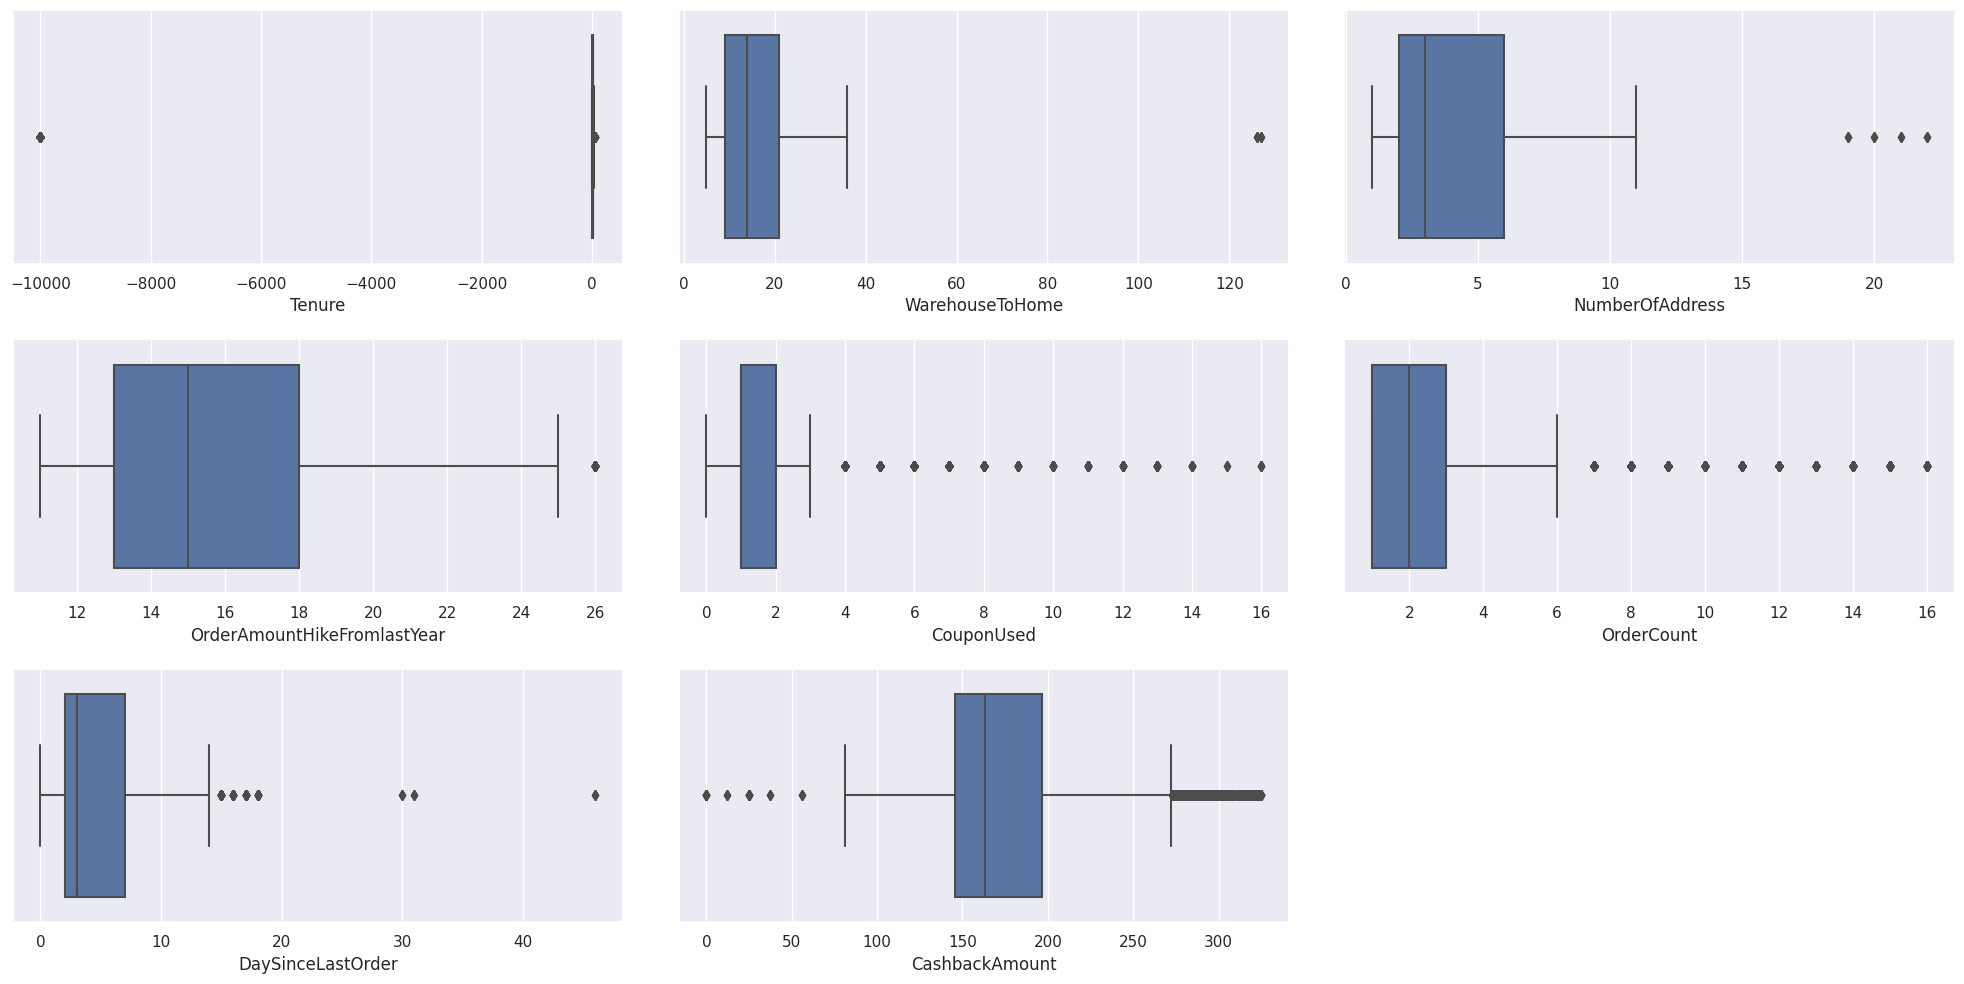

In [9]:
num_vars = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear',
            'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

fig ,axs = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
axs = axs.flatten()

for i , var in enumerate(num_vars):
  sns.boxplot(x=var,data=df,ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

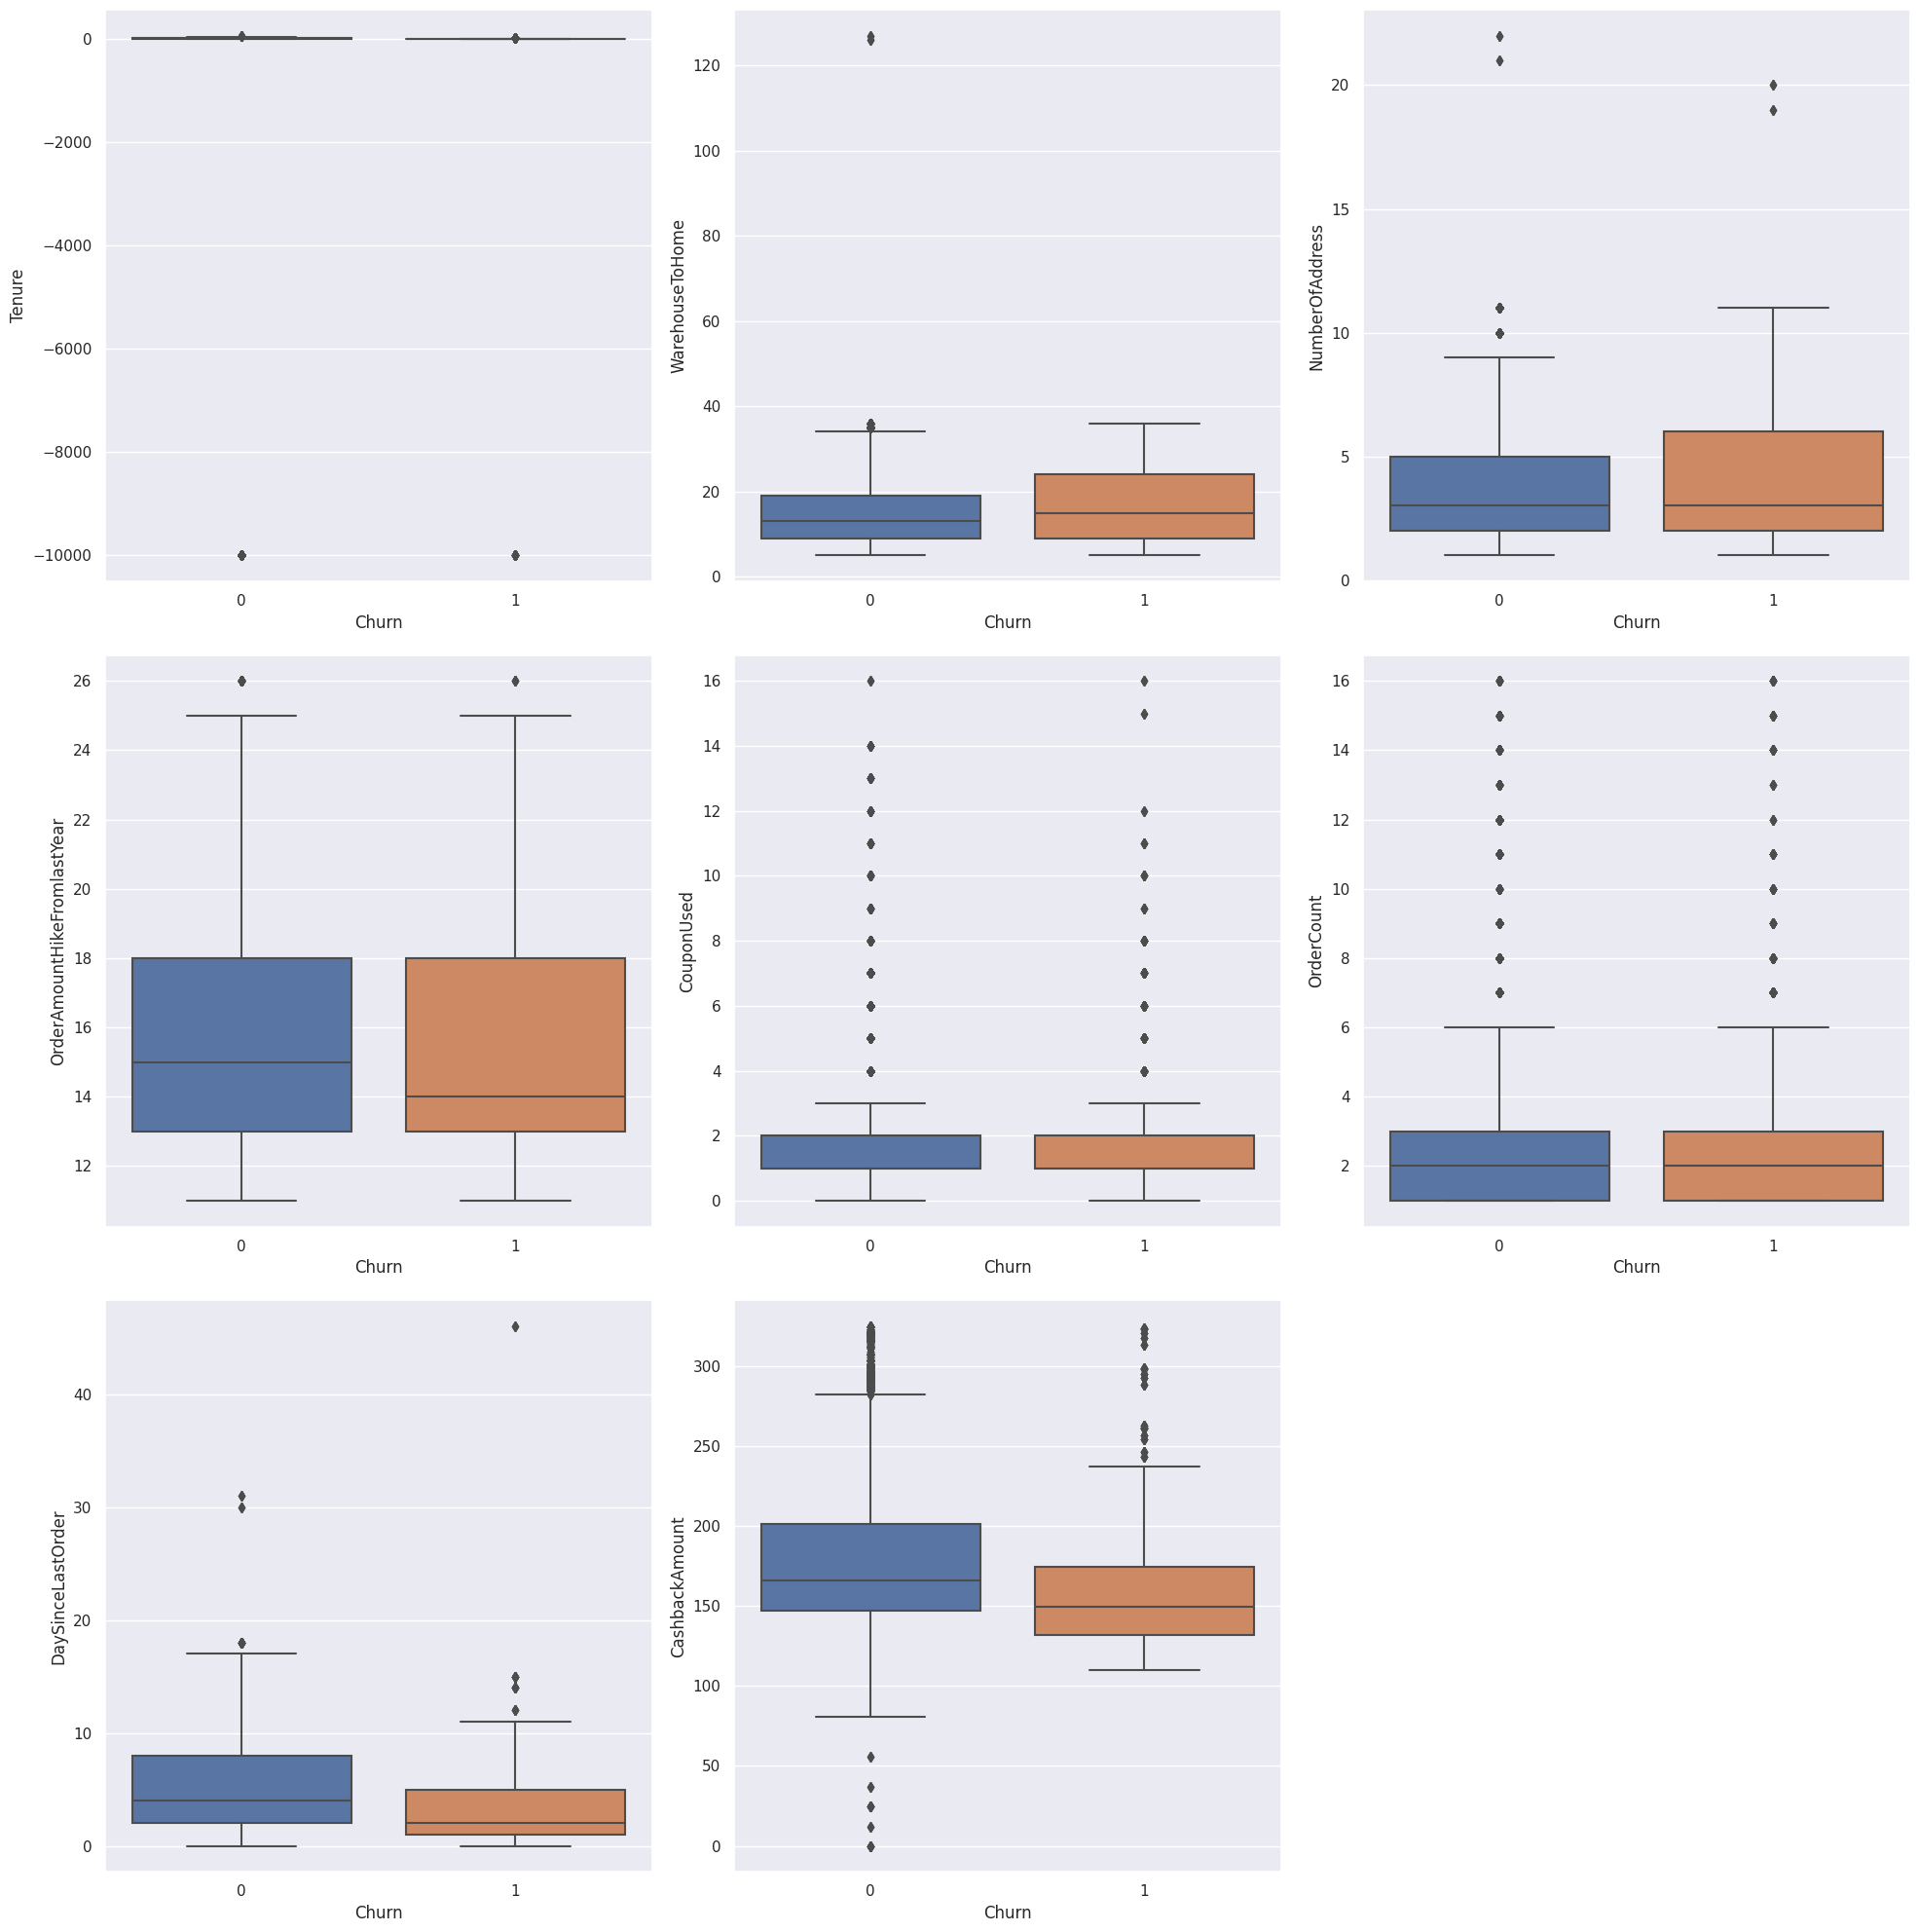

In [10]:
num_vars = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear',
            'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

fig ,axs = plt.subplots(nrows=3,ncols=3,figsize=(20,20))
axs = axs.flatten()

for i , var in enumerate(num_vars):
  sns.boxplot(y=var,x='Churn',data=df,ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

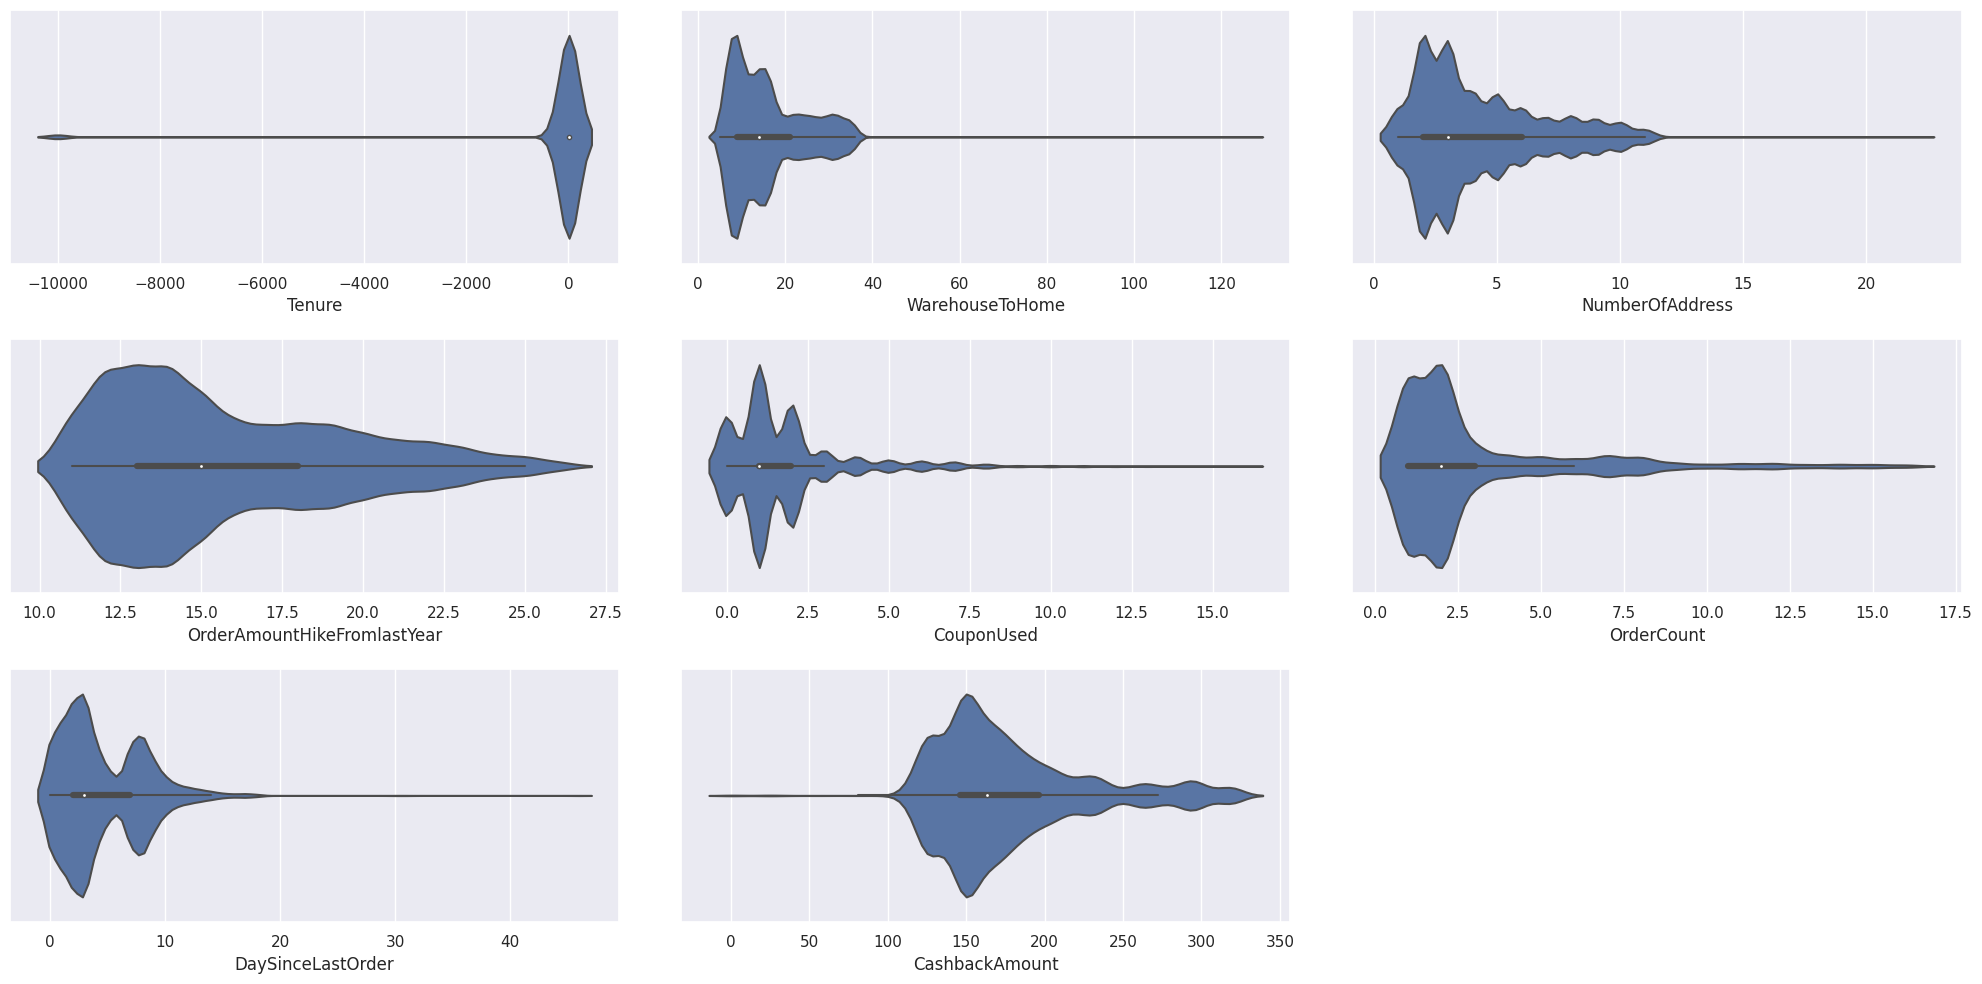

In [11]:
num_vars = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear',
            'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

fig ,axs = plt.subplots(nrows=3,ncols=3,figsize=(20,10))
axs = axs.flatten()

for i , var in enumerate(num_vars):
  sns.violinplot(x=var,data=df,ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

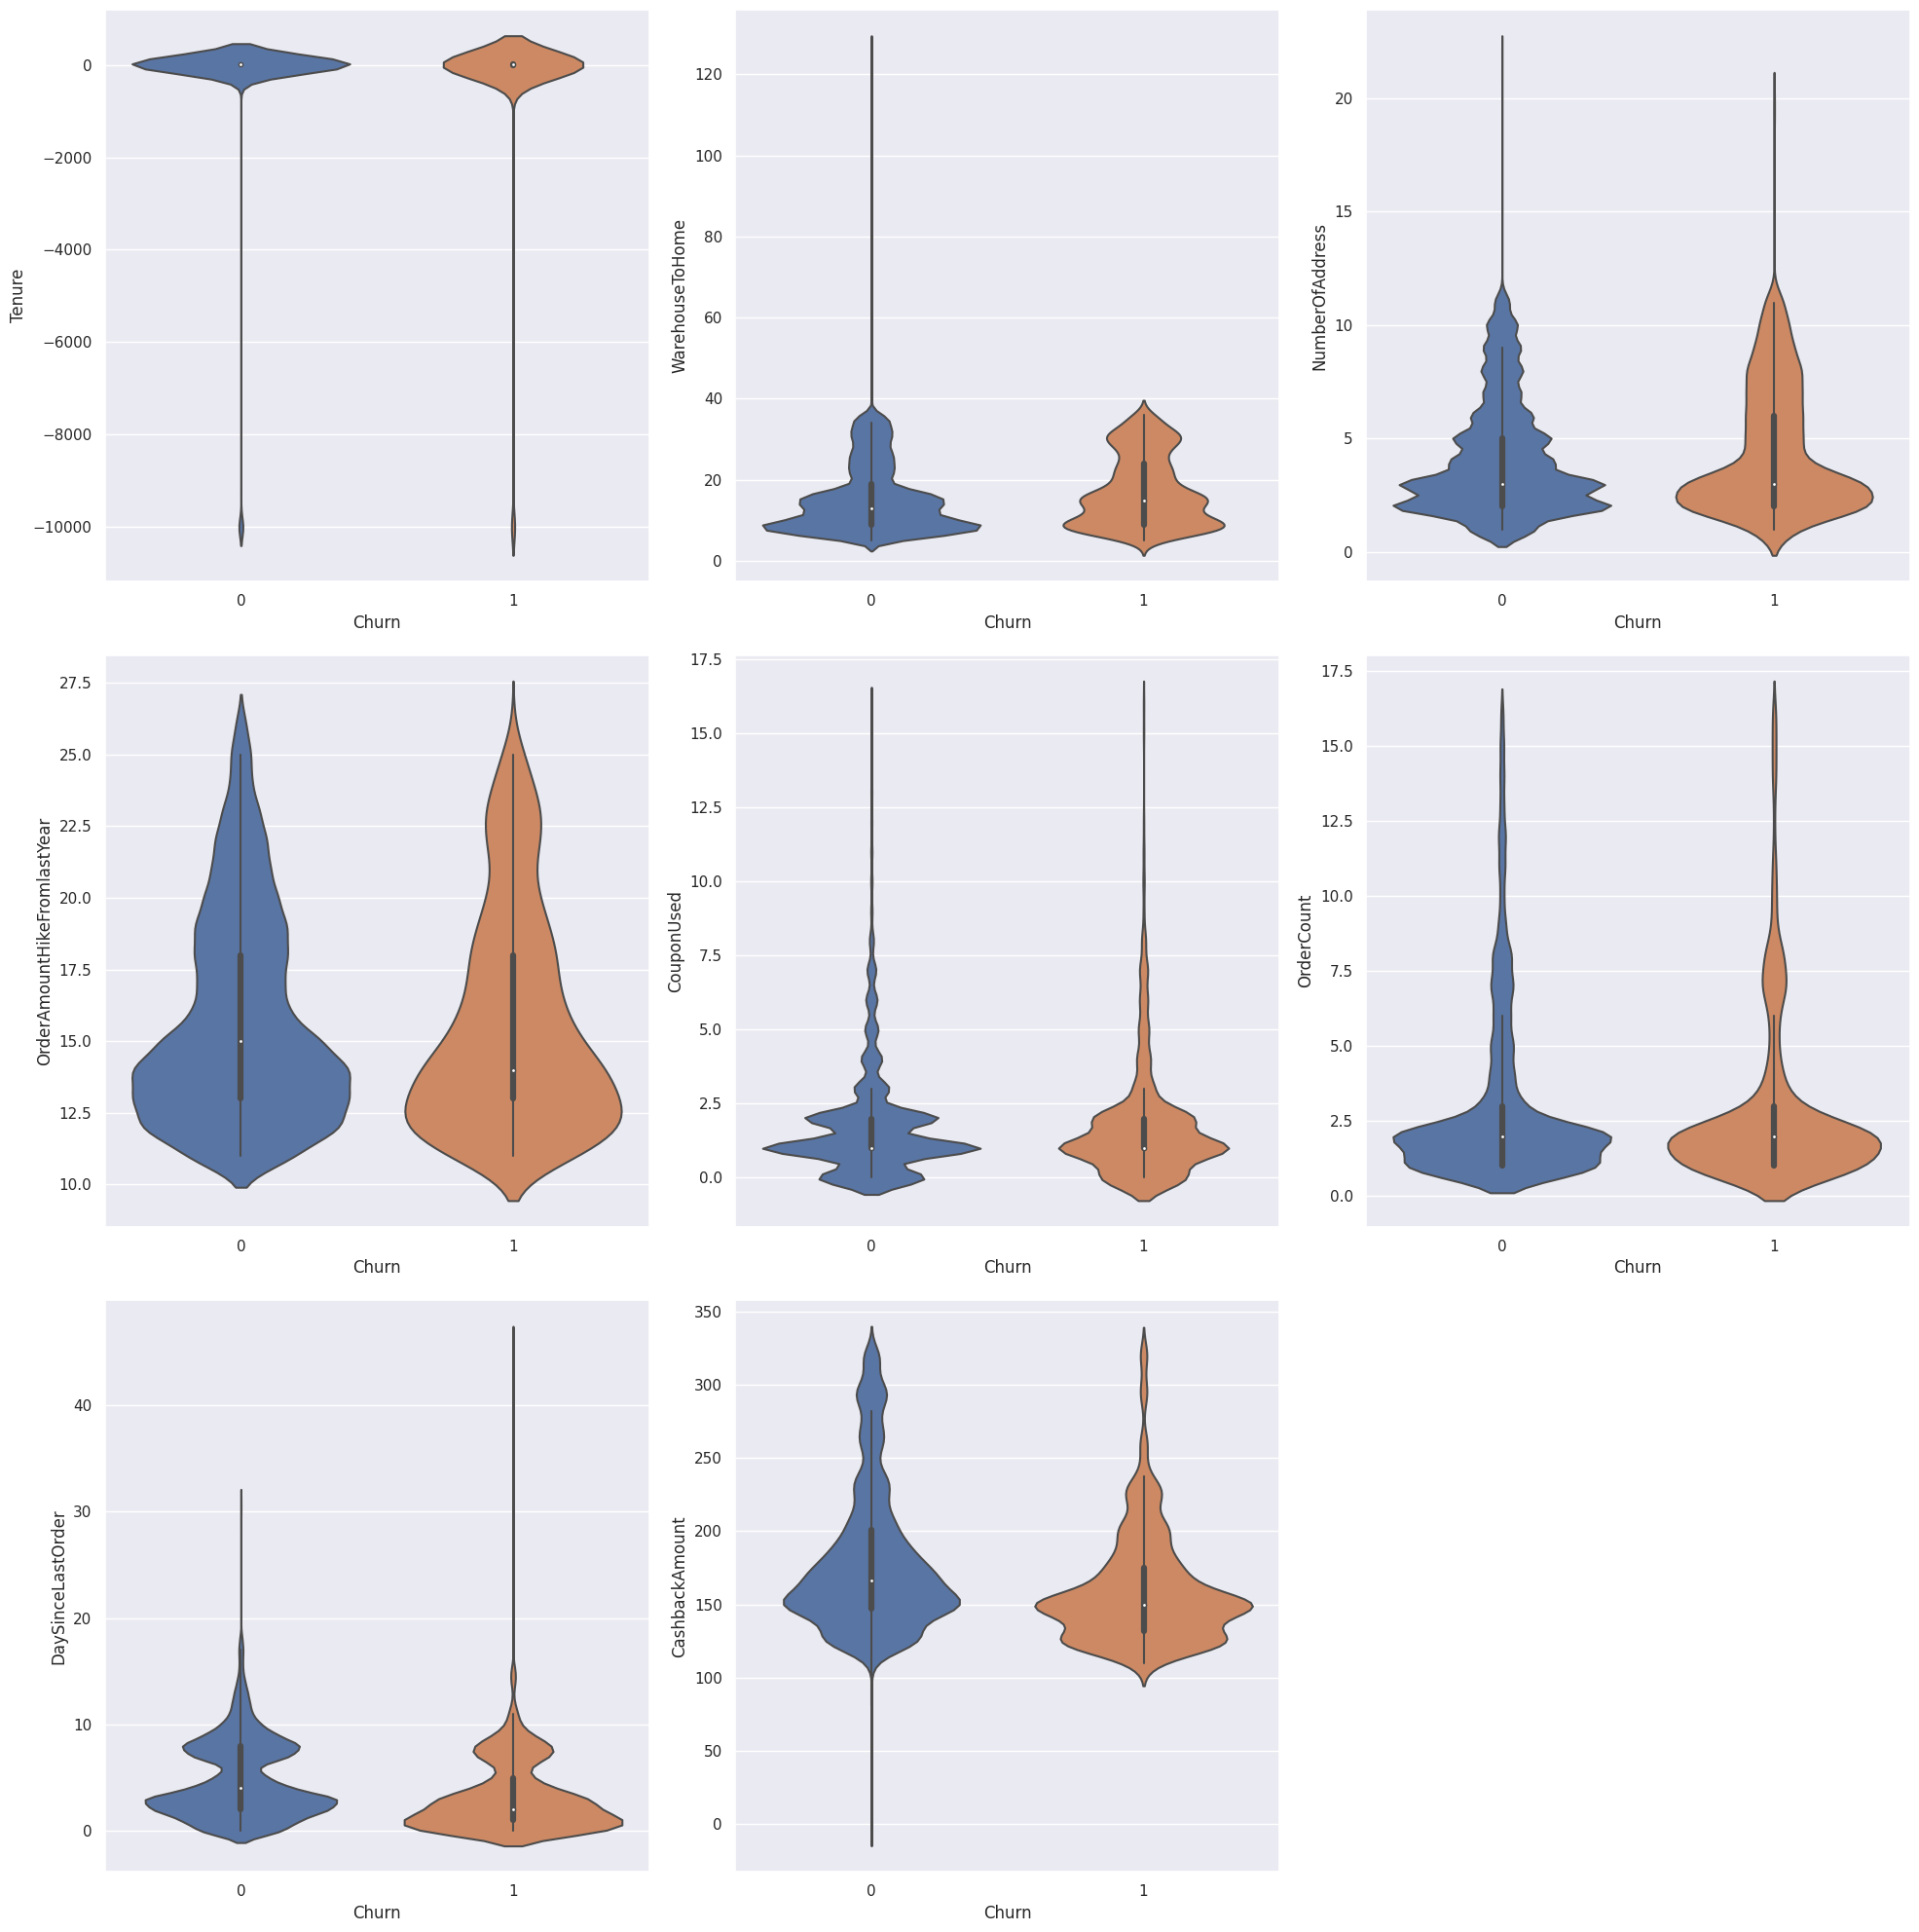

In [12]:
num_vars = ['Tenure','WarehouseToHome','NumberOfAddress','OrderAmountHikeFromlastYear',
            'CouponUsed','OrderCount','DaySinceLastOrder','CashbackAmount']

fig ,axs = plt.subplots(nrows=3,ncols=3,figsize=(20,20))
axs = axs.flatten()

for i , var in enumerate(num_vars):
  sns.violinplot(y=var,data=df,x='Churn',ax=axs[i])

fig.tight_layout()

# remove the ninth subplot
fig.delaxes(axs[8])

plt.show()

<Axes: xlabel='WarehouseToHome', ylabel='CashbackAmount'>

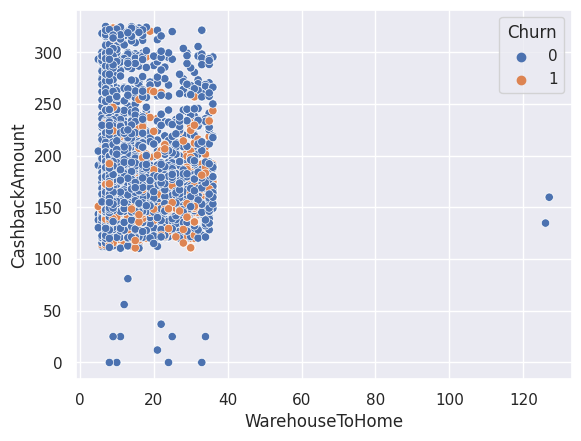

In [13]:
sns.scatterplot(x='WarehouseToHome',y='CashbackAmount',hue='Churn',data=df)

<Axes: xlabel='OrderAmountHikeFromlastYear', ylabel='CashbackAmount'>

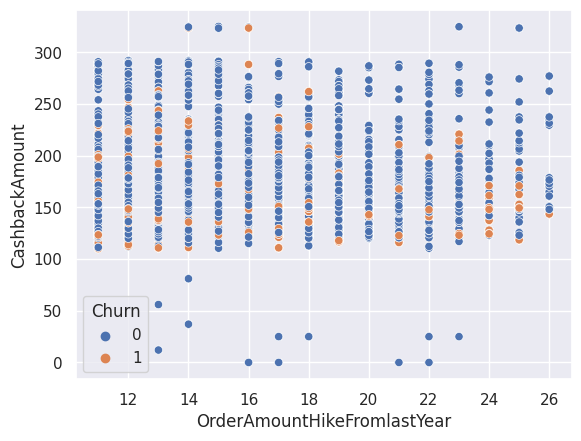

In [14]:
sns.scatterplot(x='OrderAmountHikeFromlastYear',y='CashbackAmount',hue='Churn',data=df)

<Axes: xlabel='DaySinceLastOrder', ylabel='CashbackAmount'>

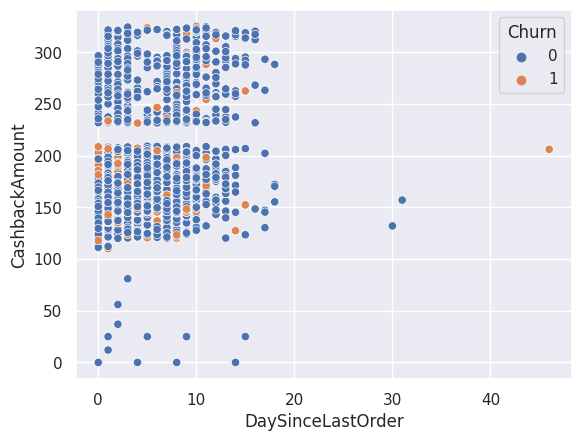

In [15]:
sns.scatterplot(x='DaySinceLastOrder',y='CashbackAmount',hue='Churn',data=df)

<Axes: xlabel='NumberOfAddress', ylabel='CashbackAmount'>

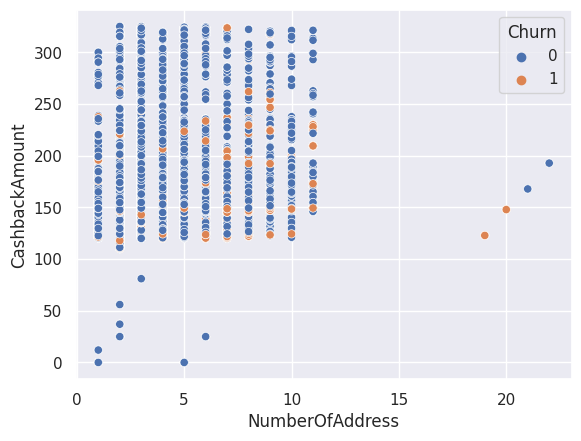

In [16]:
sns.scatterplot(x='NumberOfAddress',y='CashbackAmount',hue='Churn',data=df)

**Data Preprocessing - Continue**

In [17]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

WarehouseToHome                7.904085
DaySinceLastOrder              5.452931
OrderAmountHikeFromlastYear    4.706927
Tenure                         4.635879
OrderCount                     4.582593
CouponUsed                     4.547069
HourSpendOnApp                 4.529307
PreferredPaymentMode           3.552398
NumberOfDeviceRegistered       3.552398
MaritalStatus                  3.552398
dtype: float64

In [18]:
# fill null value with median
df['WarehouseToHome'].fillna(df['WarehouseToHome'].median(),inplace=True)
df['DaySinceLastOrder'].fillna(df['DaySinceLastOrder'].median(),inplace=True)
df['OrderAmountHikeFromlastYear'].fillna(df['OrderAmountHikeFromlastYear'].median(),inplace=True)
df['Tenure'].fillna(df['Tenure'].median(),inplace=True)
df['OrderCount'].fillna(df['OrderCount'].median(),inplace=True)
df['CouponUsed'].fillna(df['CouponUsed'].median(),inplace=True)
df['HourSpendOnApp'].fillna(df['HourSpendOnApp'].median(),inplace=True)
df['NumberOfDeviceRegistered'].fillna(df['NumberOfDeviceRegistered'].median(),inplace=True)


In [19]:
# Check missing value
check_missing = df.isnull().sum() * 100 / df.shape[0]
check_missing[check_missing > 0].sort_values(ascending=False)

PreferredPaymentMode    3.552398
MaritalStatus           3.552398
dtype: float64

**Label Encoding for Object datatype**

In [20]:
# Loop over each column in the DataFrame where dtype is 'object
for col in df.select_dtypes(include=['object']).columns:

  # Print the column name and the uniwue values
  print(f"{col}:{df[col].unique()}")

PreferredLoginDevice:['Mobile Phone' 'Phone' 'Computer' '0']
PreferredPaymentMode:['Debit Card' 'UPI' 'CC' 'Cash on Delivery' 'E wallet' 'COD' 'Credit Card'
 nan]
Gender:['Female' 'Male' 'f' 'm']
PreferedOrderCat:['Laptop & Accessory' 'Mobile' 'Mobile Phone' 'Others' 'Fashion' 'Grocery']
MaritalStatus:['Single' 'Divorced' nan 'Married']


In [21]:
from sklearn import preprocessing

# Loop over each column in the DataFrame where dtype is 'object'
for col in df.select_dtypes(include=['object']).columns:

  # Inıtialize a LabelEncoder object
  label_encoder = preprocessing.LabelEncoder()

  # Fit the encoder to the unique values in the column
  label_encoder.fit(df[col].unique())

  # Transform the column using encoder
  df[col] = label_encoder.transform(df[col])

  # Print the column name and the unique encoded values
  print(f"{col}: {df[col].unique}")

PreferredLoginDevice: <bound method Series.unique of 0        2
1        3
2        3
3        3
4        3
        ..
16885    1
16886    2
16887    2
16888    1
16889    2
Name: PreferredLoginDevice, Length: 16890, dtype: int64>
PreferredPaymentMode: <bound method Series.unique of 0        4
1        6
2        4
3        4
4        0
        ..
16885    3
16886    3
16887    4
16888    3
16889    3
Name: PreferredPaymentMode, Length: 16890, dtype: int64>
Gender: <bound method Series.unique of 0        0
1        1
2        1
3        1
4        1
        ..
16885    1
16886    1
16887    1
16888    1
16889    1
Name: Gender, Length: 16890, dtype: int64>
PreferedOrderCat: <bound method Series.unique of 0        2
1        3
2        3
3        2
4        3
        ..
16885    2
16886    0
16887    2
16888    2
16889    2
Name: PreferedOrderCat, Length: 16890, dtype: int64>
MaritalStatus: <bound method Series.unique of 0        2
1        2
2        2
3        2
4        2
        ..


**Correlation Heatmap**

<Axes: >

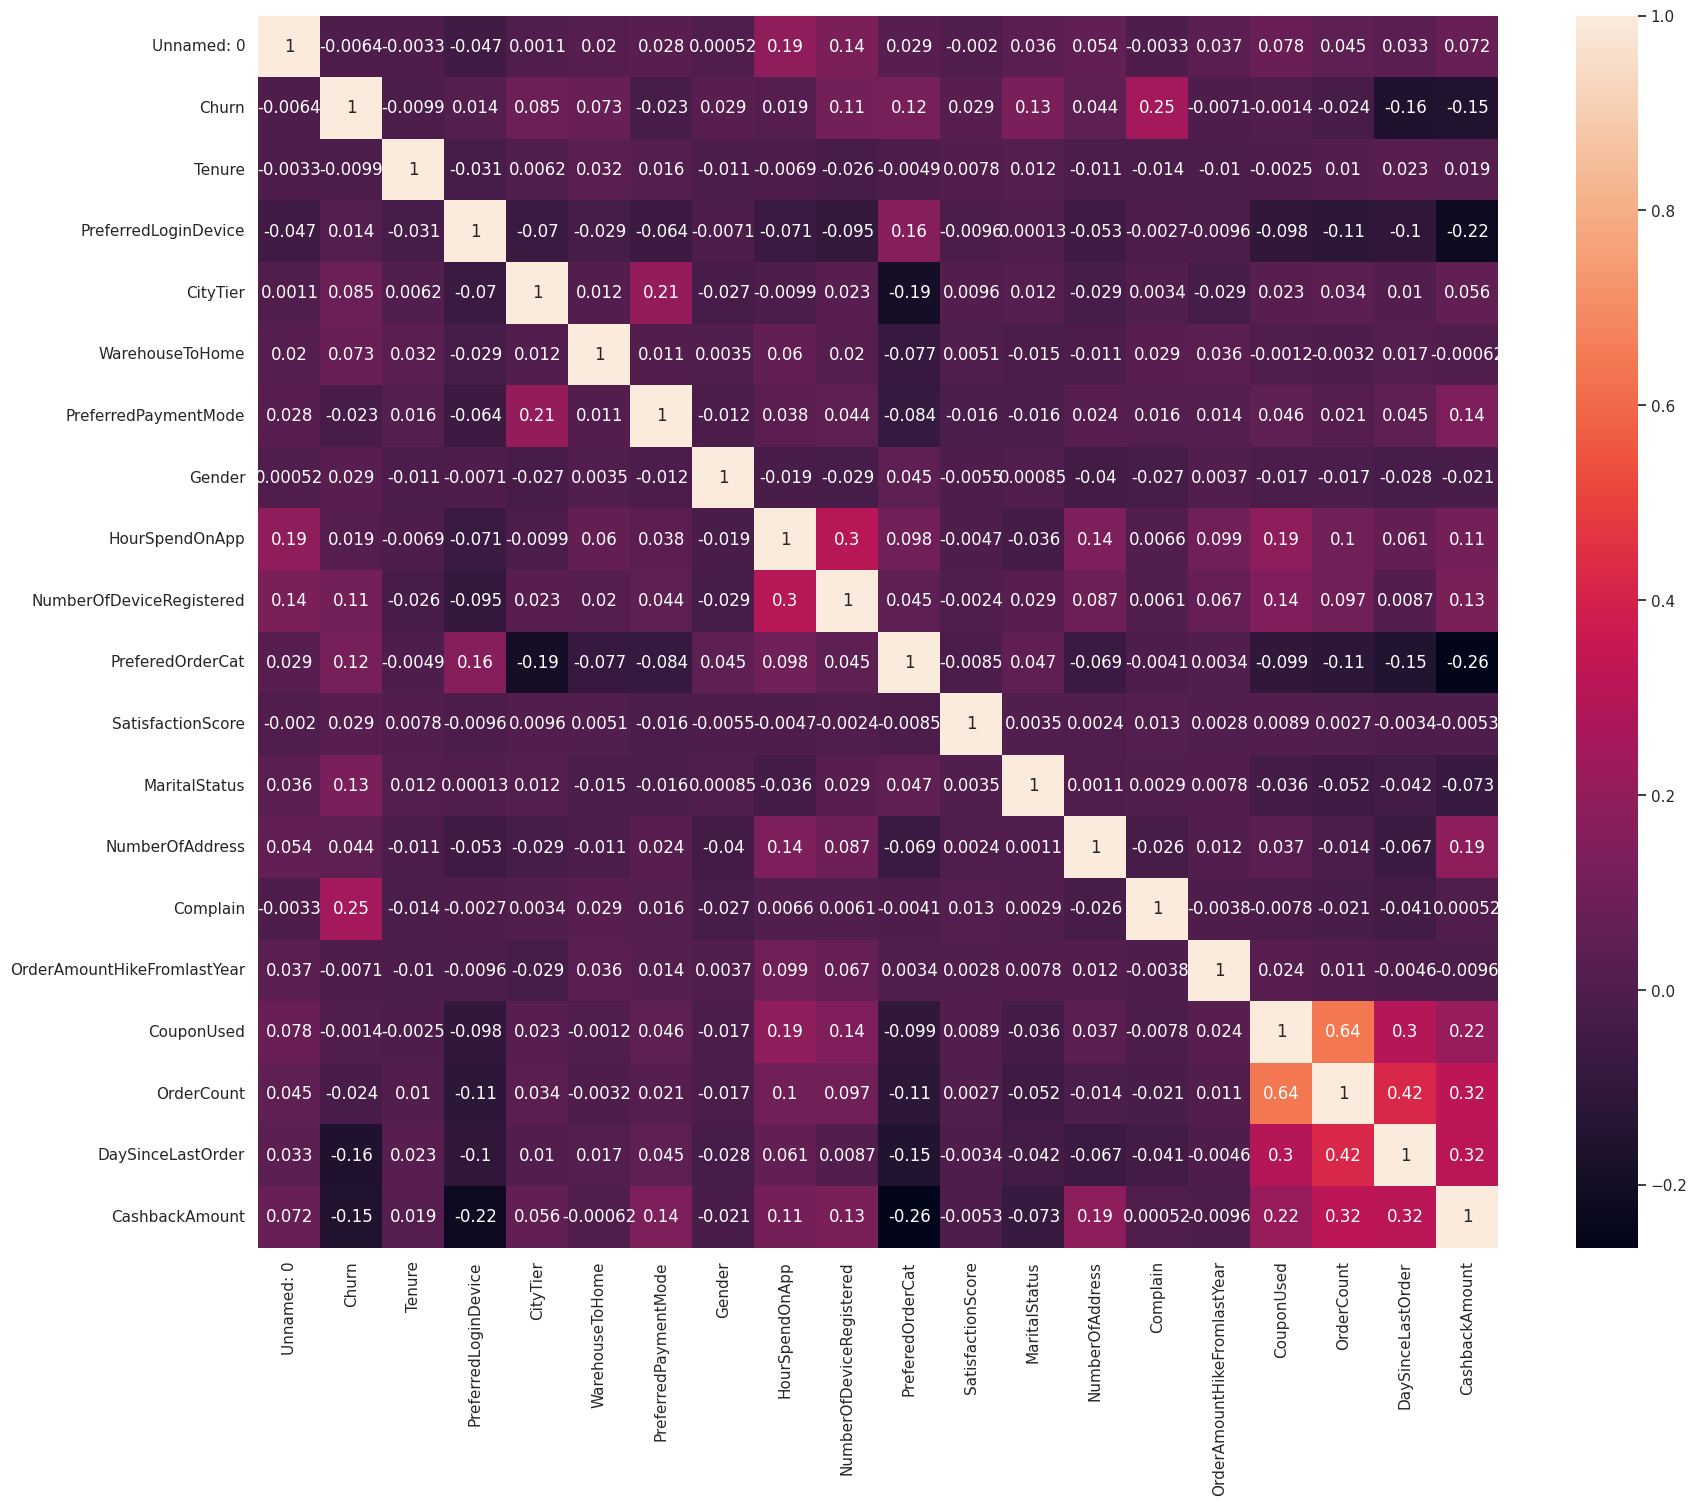

In [22]:
plt.figure(figsize=(20,16))
sns.heatmap(df.corr(),fmt='.2g',annot=True)

**Train Test Split**

In [23]:
from sklearn.model_selection import train_test_split
#Select the features (X) and the targer variable (y)
X = df.drop('Churn',axis=1)
y = df['Churn']

# Split the data into training and test sets
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**Remove Outlier in Train Data Using Z-Score**

In [24]:
df.head()

,Unnamed: 0,Churn,Tenure,PreferredLoginDevice,CityTier,WarehouseToHome,PreferredPaymentMode,Gender,HourSpendOnApp,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,OrderAmountHikeFromlastYear,CouponUsed,OrderCount,DaySinceLastOrder,CashbackAmount
0,0,1,4.0,2,3,6.0,4,0,3.0,3.0,2,2,2,9,1,11.0,1.0,1.0,5.0,159.93
1,1,1,9.0,3,1,8.0,6,1,3.0,4.0,3,3,2,7,1,15.0,0.0,1.0,0.0,120.90
2,2,1,9.0,3,1,30.0,4,1,2.0,4.0,3,3,2,6,1,14.0,0.0,1.0,3.0,120.28
3,3,1,0.0,3,3,15.0,4,1,2.0,4.0,2,589314,2,8,0,23.0,0.0,1.0,3.0,134.07
4,4,1,0.0,3,1,12.0,0,1,3.0,3.0,3,5,2,3,0,11.0,1.0,1.0,3.0,129.60


In [25]:
from sklearn.model_selection import train_test_split

# Select the column for outlier removal
selected_column = ['WarehouseToHome','DaySinceLastOrder','CouponUsed','OrderCount']

# Split the data into training and test sets
train_df,test_df = train_test_split(df,test_size=0.2,random_state=42)

# Calculated the z-scores for the selected column in the training set
train_z_scores = np.abs((train_df[selected_column] - train_df[selected_column].mean()) / train_df[selected_column].std())

# Set the threshhold for defining outliers (e.g., z-score > 3)
threshold = 3

# Filter the training DataFrame, removing rows with z-scores above the threshold in the selected column
train_df_no_outliers = train_df[train_z_scores <= threshold]

In [26]:
from sklearn.linear_model import LogisticRegression
logr=LogisticRegression(random_state=0)
logr.fit(X_train,y_train)

LogisticRegression(random_state=0)

In [27]:
y_pred = logr.predict(X_test)


In [28]:
y_pred

array([0, 0, 0, ..., 0, 0, 0])

In [29]:
y_test

13418    1
12747    0
346      0
15325    1
8486     0
        ..
388      1
1953     1
12705    1
6874     1
8773     1
Name: Churn, Length: 3378, dtype: int64

In [30]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[2800    0]
 [ 578    0]]
